In [7]:
import imageio

# Replace this line
# from scipy.misc import imread

# With this line
imread = imageio.imread


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from scipy import sparse
import scipy.stats as ss
import time
import warnings

# Use imread from imageio
imread = imageio.imread


In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

In [17]:
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


In [23]:
import nltk

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIKRAM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [26]:
train=pd.read_csv("Terms-to-Block.csv")
test=pd.read_csv("Terms-to-Block.csv")

In [27]:
#take a peak
train.tail(10)

,"a55,"
2126,c-o-c-k
2127,dong
2128,cumming
2129,prick
2130,viagra
2131,shaggin
2132,vagiina
2133,pr1c
2134,twathead
2135,hell


In [28]:
nrow_train=train.shape[0]
nrow_test=test.shape[0]
sum=nrow_train+nrow_test
print("       : train : test")
print("rows   :",nrow_train,":",nrow_test)
print("perc   :",round(nrow_train*100/sum),"   :",round(nrow_test*100/sum))

       : train : test
rows   : 2136 : 2136
perc   : 50    : 50


In [29]:
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  2136
Total clean comments =  2136
Total tags = 0.0


In [32]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
if 'comment_text' in train.columns:
    # Fill missing values in 'comment_text' with "unknown"
    train['comment_text'].fillna('unknown', inplace=True)
else:
    print("'comment_text' column is missing in the training data.")

if 'comment_text' in test.columns:
    # Fill missing values in 'comment_text' with "unknown"
    test['comment_text'].fillna('unknown', inplace=True)
else:
    print("'comment_text' column is missing in the test data.")


Check for missing values in Train dataset
a55,     0
clean    0
dtype: int64
Check for missing values in Test dataset
a55,    0
dtype: int64
filling NA with "unknown"
'comment_text' column is missing in the training data.
'comment_text' column is missing in the test data.


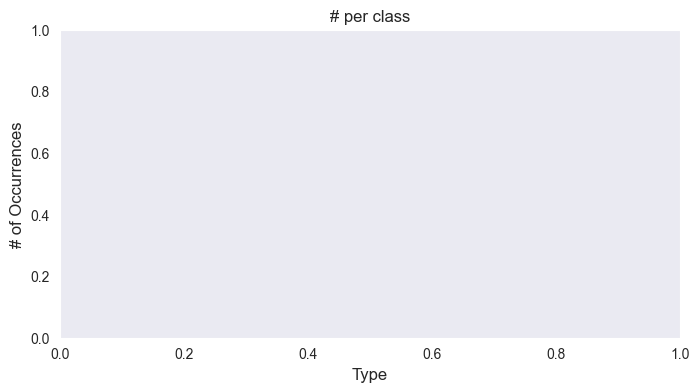

In [34]:
x = train.iloc[:, 2:].sum()

# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type', fontsize=12)

# Adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

plt.show()

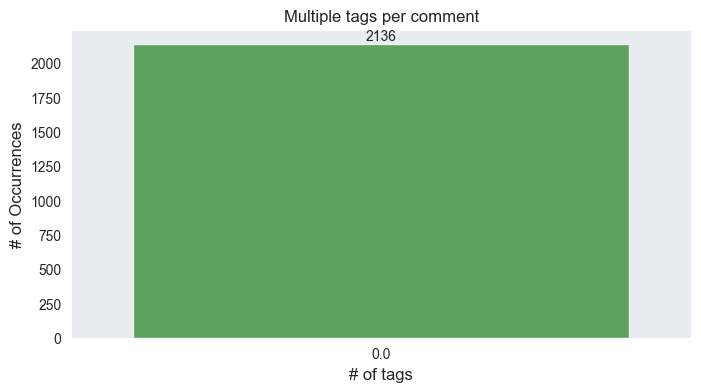

In [36]:
x = rowsums.value_counts()

# Define a color palette if not already defined
color = sns.color_palette()

# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags', fontsize=12)

# Adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

plt.show()

In [40]:
temp_df = train.iloc[:, 2:-1]  # Assuming you want to exclude some columns at the end

# Check for NaN values in temp_df
if temp_df.isnull().values.any():
    print("Warning: NaN values found in temp_df")

# Compute correlation matrix
corr = temp_df.corr()

# Check dimensions of corr to debug
print("Shape of corr matrix:", corr.shape)

# Plotting heatmap if corr is not empty
if not corr.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                annot=True)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Correlation matrix is empty or has zero dimensions.")

Shape of corr matrix: (0, 0)
Correlation matrix is empty or has zero dimensions.
